In [1]:
"""
This cell does the initial project setup.
If you start a new script or notebook, make sure to copy & paste this part.

A script with this code uses the location of the `.env` file as the anchor for
the whole project (= PROJECT_ROOT). Afterwards, code inside the `src` directory
are available for import.
"""
from pathlib import Path
import sys
from dotenv import load_dotenv, find_dotenv
load_dotenv()
PROJECT_ROOT = Path(find_dotenv()).parent
sys.path.append(str(PROJECT_ROOT.joinpath("src")))
print(f"Project root directory: {PROJECT_ROOT}")

Project root directory: /Users/hamida/Documents/GitHub/male-drosophila-visual-system-connectome-code


In [2]:
from neuprint import NeuronCriteria as NC

import navis
import navis.interfaces.neuprint as neu

from utils import olc_client

c = olc_client.connect(verbose=True)

Connected to https://neuprint-cns.janelia.org[cns].
Client: neuprint-python v0.1.0
User: aishahamid201@gmail.com [readwrite]



In [3]:
import matplotlib.pyplot as plt

In [4]:
from neuprint import fetch_neurons, fetch_synapses, SynapseCriteria as SC, fetch_adjacencies, merge_neuron_properties, NeuronCriteria as NC

In [5]:
neuron_df, roi_df = fetch_neurons(NC(type='aMe12'))

/Users/hamida/Documents/GitHub/male-drosophila-visual-system-connectome-code/.pixi/envs/default/lib/python3.12/site-packages/neuprint/client.py:609: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  neuron_props_val = df_results.iloc[0][0]
/Users/hamida/Documents/GitHub/male-drosophila-visual-system-connectome-code/.pixi/envs/default/lib/python3.12/site-packages/neuprint/client.py:619: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  neuron_props_val = df_results.iloc[0][0]


In [6]:
neuron_df

,bodyId,instance,type,pre,post,downstream,upstream,size,status,statusLabel,...,group,superclass,synonyms,hemibrainType,trumanHl,rootSide,assignedOlHex1,fruDsx,inputRois,outputRois
0,12211,aMe12_L,aMe12,742,2161,5671,2161,1477100908,Traced,Prelim Roughly traced,...,12211,visual_projection,None,aMe12,None,None,None,None,"[AME(L), AME(R), CentralBrain, CentralBrain-un...","[AME(L), AME(R), CentralBrain, CentralBrain-un..."
1,12517,aMe12_L,aMe12,724,2426,5514,2426,1462964446,Traced,Prelim Roughly traced,...,12211,visual_projection,None,aMe12,None,None,None,None,"[AME(L), CentralBrain, CentralBrain-unspecifie...","[AME(L), CentralBrain, CentralBrain-unspecifie..."
2,12737,aMe12_L,aMe12,776,2559,5867,2559,1640224342,Traced,Prelim Roughly traced,...,12211,visual_projection,None,aMe12,None,None,None,None,"[AME(L), AME(R), CentralBrain, CentralBrain-un...","[AME(R), CentralBrain, CentralBrain-unspecifie..."
3,12740,aMe12_R,aMe12,1117,3143,8489,3143,2291782370,Traced,Roughly traced,...,12211,visual_projection,None,aMe12,None,None,None,None,"[AME(L), AME(R), CentralBrain, CentralBrain-un...","[AME(L), AME(R), CentralBrain, CentralBrain-un..."
4,13190,aMe12_R,aMe12,1021,3168,7900,3168,2130536742,Traced,Roughly traced,...,12211,visual_projection,None,aMe12,None,None,None,None,"[AME(R), CentralBrain, CentralBrain-unspecifie...","[AME(R), CentralBrain, CentralBrain-unspecifie..."
5,532334,aMe12_L,aMe12,813,2305,6221,2305,1714409940,Traced,Prelim Roughly traced,...,12211,visual_projection,None,aMe12,None,None,None,None,"[AME(L), AME(R), CentralBrain, CentralBrain-un...","[AME(L), AME(R), CentralBrain, CentralBrain-un..."


In [7]:
syn_df = fetch_synapses()

TypeError: fetch_synapses() missing 1 required positional argument: 'neuron_criteria'

In [8]:
Neuron_criteria_pre = NC(rois=['LA(R)','ME(R)','AME(R)','LO(R)','LOP(R)'], roi_req='any')
Neuron_criteria_post  = NC(type='Dm2')

neurons_OL_df,connections_OL_df = fetch_adjacencies(Neuron_criteria_pre,Neuron_criteria_post, min_roi_weight=3)
conn_OL_df = merge_neuron_properties(neurons_OL_df, connections_OL_df, 'type')

  0%|          | 0/8 [00:00<?, ?it/s]

In [9]:
conn_OL_df

,bodyId_pre,bodyId_post,roi,weight,type_pre,type_post
0,10046,43677,ME(R),8,MeVC11,Dm2
1,10046,68512,ME(R),6,MeVC11,Dm2
2,10046,82671,ME(R),4,MeVC11,Dm2
3,10046,98426,ME(R),8,MeVC11,Dm2
4,10046,99592,ME(R),3,MeVC11,Dm2
...,...,...,...,...,...,...
17312,923623,112832,ME(R),7,Dm2,Dm2
17313,923623,129674,ME(R),6,Dm2,Dm2
17314,946044,135522,ME(R),5,None,Dm2
17315,116032876,170670,ME(R),8,R8p,Dm2


(array([1.7291e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.8000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 8.0000e+00]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

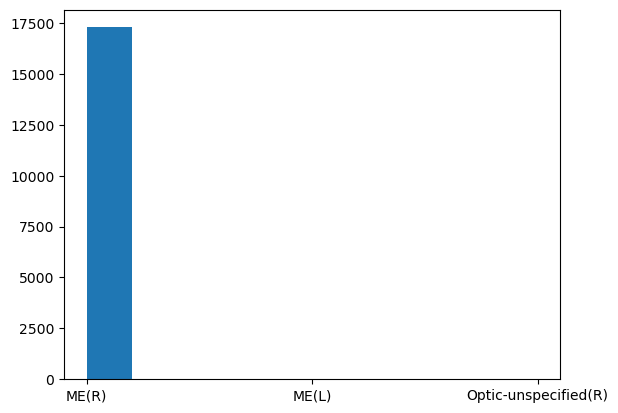

In [10]:
plt.hist(conn_OL_df['roi'])

In [11]:
conn_OL_df['roi'].unique()

array(['ME(R)', 'ME(L)', 'Optic-unspecified(R)'], dtype=object)

In [12]:
from neuprint import fetch_roi_hierarchy

# Show the ROI hierarchy, with primary ROIs marked with '*'
print(fetch_roi_hierarchy(False, mark_primary=True, format='text'))

CNS
 +-- CV*
 +-- CentralBrain
 |   +-- AB(L)*
 |   +-- AB(R)*
 |   +-- AL(L)*
 |   +-- AL(R)*
 |   +-- AMMC(L)*
 |   +-- AMMC(R)*
 |   +-- AOTU(L)*
 |   +-- AOTU(R)*
 |   +-- ATL(L)*
 |   +-- ATL(R)*
 |   +-- AVLP(L)*
 |   +-- AVLP(R)*
 |   +-- BU(L)*
 |   +-- BU(R)*
 |   +-- CA(L)*
 |   +-- CA(R)*
 |   +-- CAN(L)*
 |   +-- CAN(R)*
 |   +-- CRE(L)*
 |   +-- CRE(R)*
 |   +-- CRN
 |   +-- CentralBrain-unspecified*
 |   +-- EB*
 |   +-- EPA(L)*
 |   +-- EPA(R)*
 |   +-- FB*
 |   +-- FLA(L)*
 |   +-- FLA(R)*
 |   +-- GA(L)*
 |   +-- GA(R)*
 |   +-- GNG*
 |   +-- GOR(L)*
 |   +-- GOR(R)*
 |   +-- IB*
 |   +-- ICL(L)*
 |   +-- ICL(R)*
 |   +-- IPS(L)*
 |   +-- IPS(R)*
 |   +-- LAL(L)*
 |   +-- LAL(R)*
 |   +-- LH(L)*
 |   +-- LH(R)*
 |   +-- NO*
 |   +-- PB*
 |   +-- PED(L)*
 |   +-- PED(R)*
 |   +-- PLP(L)*
 |   +-- PLP(R)*
 |   +-- PRW*
 |   +-- PVLP(L)*
 |   +-- PVLP(R)*
 |   +-- ROB(L)*
 |   +-- ROB(R)*
 |   +-- RUB(L)*
 |   +-- RUB(R)*
 |   +-- SAD*
 |   +-- SCL(L)*
 |   +-- SCL(R)*
 |

In [13]:
# Neuron search criteria

from neuprint import NeuronCriteria as NC

# Example: Select a specific body
criteria = 387023620
criteria = NC(bodyId=387023620)

# Example: Select several bodies
criteria = [387023620, 387364605, 416642425]
criteria = NC(bodyId=[387023620, 387364605, 416642425])

# Example: Select bodies by exact type
criteria = 'PEN_b(PEN2)'
criteria = NC(type='PENPEN_b(PEN2)')

# Example: Select bodies by exact instance
criteria = 'PEN(PB06)_b_L4'
criteria = NC(type='PEN(PB06)_b_L4')

# Example: Select bodies by type name pattern
criteria = NC(type='PEN.*')

# Example: Select bodies by region (input or output)
criteria = NC(rois=['PB', 'EB'])

# Example: Select traced neurons which intersect the PB ROI with at least 100 inputs (PSDs).
criteria = NC(inputRois=['PB'], min_roi_inputs=100, status='Traced', cropped=False)

In [14]:
from neuprint import fetch_neurons
neuron_df, roi_counts_df = fetch_neurons(criteria)

In [15]:
neuron_df[['bodyId', 'instance', 'type', 'pre', 'post', 'status', 'size']]

,bodyId,instance,type,pre,post,status,size
0,10011,OA-AL2i1_L,OA-AL2i1,10297,13558,Traced,14873014448
1,10072,OA-AL2i1_R,OA-AL2i1,11669,15301,Traced,15947097542
2,10513,Delta7(PB15)_L3R6_R,Delta7,589,1180,Traced,974078502
3,10539,EPG(PB08)_R2,EPG,668,4825,Traced,961479324
4,10817,PFNv(PB05)_L4_C3,PFNv,225,705,Traced,239536727
...,...,...,...,...,...,...,...
422,555342,LPsP(PB13)_R,LPsP,2494,5866,Traced,3336055813
423,556346,EPG(PB08)_L6,EPG,490,3942,Traced,769993767
424,556347,EPG(PB08)_R4,EPG,603,4180,Traced,855136642
425,567101,PFL3(PB12c)_R3_C5,PFL3,596,2814,Traced,956127382


In [17]:
roi_counts_df

,bodyId,roi,pre,post,downstream,upstream
0,10011,AMMC(L),0,13,0,13
1,10011,AMMC(R),0,4,0,4
2,10011,CAN(L),1,297,5,297
3,10011,CAN(R),0,93,0,93
4,10011,CentralBrain,339,5065,1346,5065
...,...,...,...,...,...,...
7626,567101,PB,0,411,0,411
7627,568155,CentralBrain,619,1172,5265,1172
7628,568155,CentralBrain-unspecified,1,13,4,13
7629,568155,NotPrimary,0,0,0,0
